In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


df = pd.read_csv('movies.csv')

In [3]:
# Let's Look At The Data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
#Looking For Any Missing Data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [11]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [47]:
df = df.dropna()

In [49]:
#Changing Data Type of Column
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [95]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,527,5,0,2009,684,7.8,1100000.0,1134,1755,2280,55,237000000,2847246203,2204,162.0,31
7445,529,5,0,2019,176,8.4,903000.0,160,729,2189,55,356000000,2797501328,1568,181.0,41
3045,6807,5,6,1997,692,7.8,1100000.0,1134,1755,1557,55,200000000,2201647264,2204,194.0,19
6663,5074,5,0,2015,686,7.8,876000.0,1105,2517,505,55,245000000,2069521700,1502,138.0,37
7244,530,5,0,2018,185,8.4,897000.0,160,729,2189,55,321000000,2048359754,1568,149.0,40


In [97]:
#Creating Correct Year Column
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,527,5,0,2009,684,7.8,1100000.0,1134,1755,2280,55,237000000,2847246203,2204,162.0,NaN
7445,529,5,0,2019,176,8.4,903000.0,160,729,2189,55,356000000,2797501328,1568,181.0,NaN
3045,6807,5,6,1997,692,7.8,1100000.0,1134,1755,1557,55,200000000,2201647264,2204,194.0,NaN
6663,5074,5,0,2015,686,7.8,876000.0,1105,2517,505,55,245000000,2069521700,1502,138.0,NaN
7244,530,5,0,2018,185,8.4,897000.0,160,729,2189,55,321000000,2048359754,1568,149.0,NaN


In [53]:
df= df.sort_values(by=['gross'], inplace = False, ascending = False)

In [57]:
pd.set_option('display.max_rows',None)

In [59]:
# Drop Any Duplicates
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

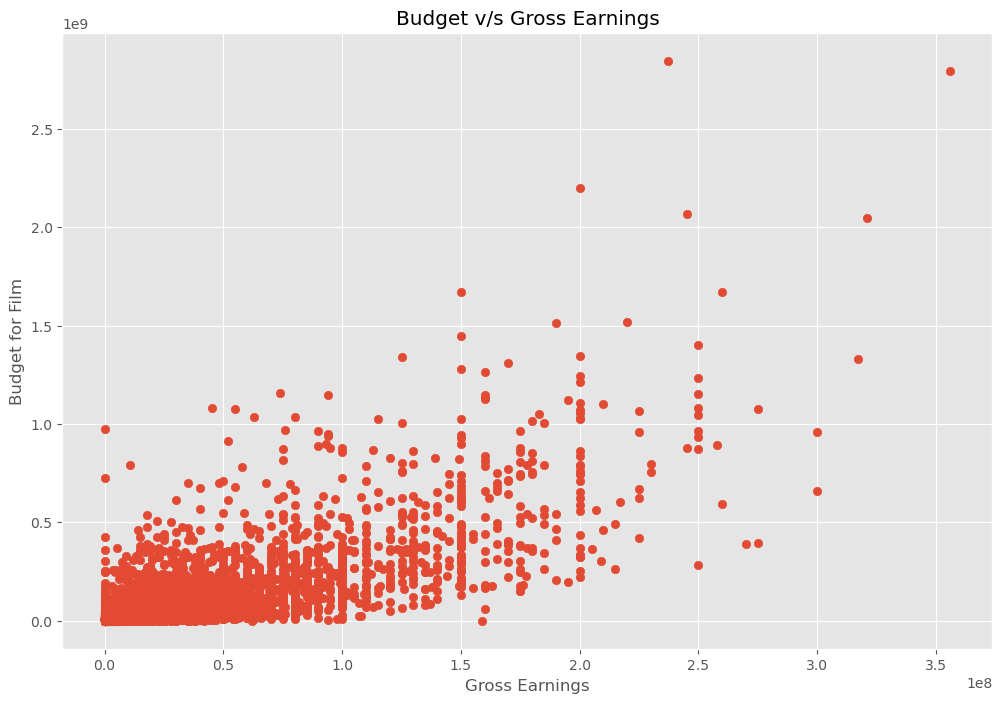

In [61]:
# Scatter plot with budget v/s gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget v/s Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')
plt.show()

In [63]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

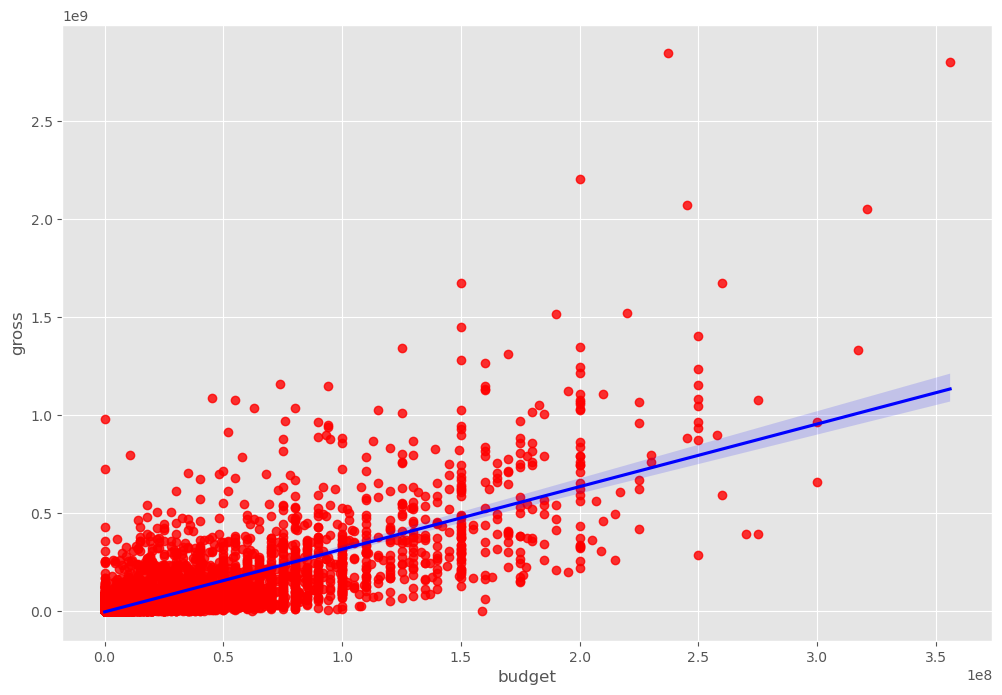

In [65]:
# Plot the Budget v/s Gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [ ]:
# Looking at the correlation now


In [75]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.102859,0.226686,0.314683,0.264557,0.120743
score,0.102859,1.000000,0.412371,0.057153,0.188572,0.400937
votes,0.226686,0.412371,1.000000,0.485225,0.632940,0.309372
budget,0.314683,0.057153,0.485225,1.000000,0.750535,0.270024
gross,0.264557,0.188572,0.632940,0.750535,1.000000,0.244935
runtime,0.120743,0.400937,0.309372,0.270024,0.244935,1.000000


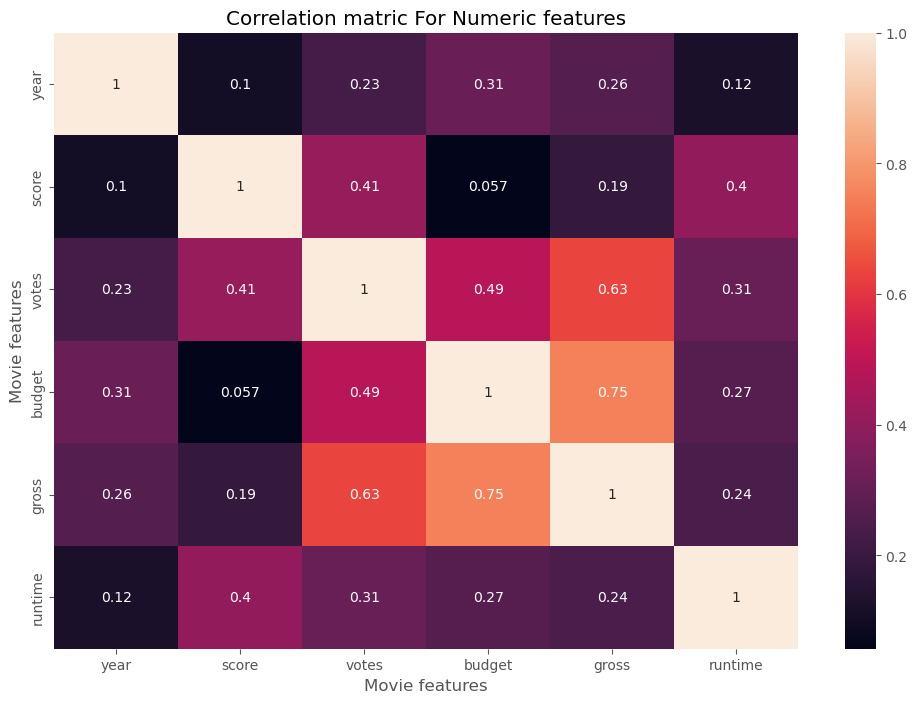

In [79]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matric For Numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')
plt.show()

In [99]:
# Looking At Company
df_numarized = df

for col_name in df_numarized.columns:
    if(df_numarized[col_name].dtype == 'object'):
        df_numarized[col_name] = df_numarized[col_name].astype('category')
        df_numarized[col_name] = df_numarized[col_name].cat.codes

df_numarized.head()
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,527,5,0,2009,684,7.8,1100000.0,1134,1755,2280,55,237000000,2847246203,2204,162.0,NaN
7445,529,5,0,2019,176,8.4,903000.0,160,729,2189,55,356000000,2797501328,1568,181.0,NaN
3045,6807,5,6,1997,692,7.8,1100000.0,1134,1755,1557,55,200000000,2201647264,2204,194.0,NaN
6663,5074,5,0,2015,686,7.8,876000.0,1105,2517,505,55,245000000,2069521700,1502,138.0,NaN
7244,530,5,0,2018,185,8.4,897000.0,160,729,2189,55,321000000,2048359754,1568,149.0,NaN


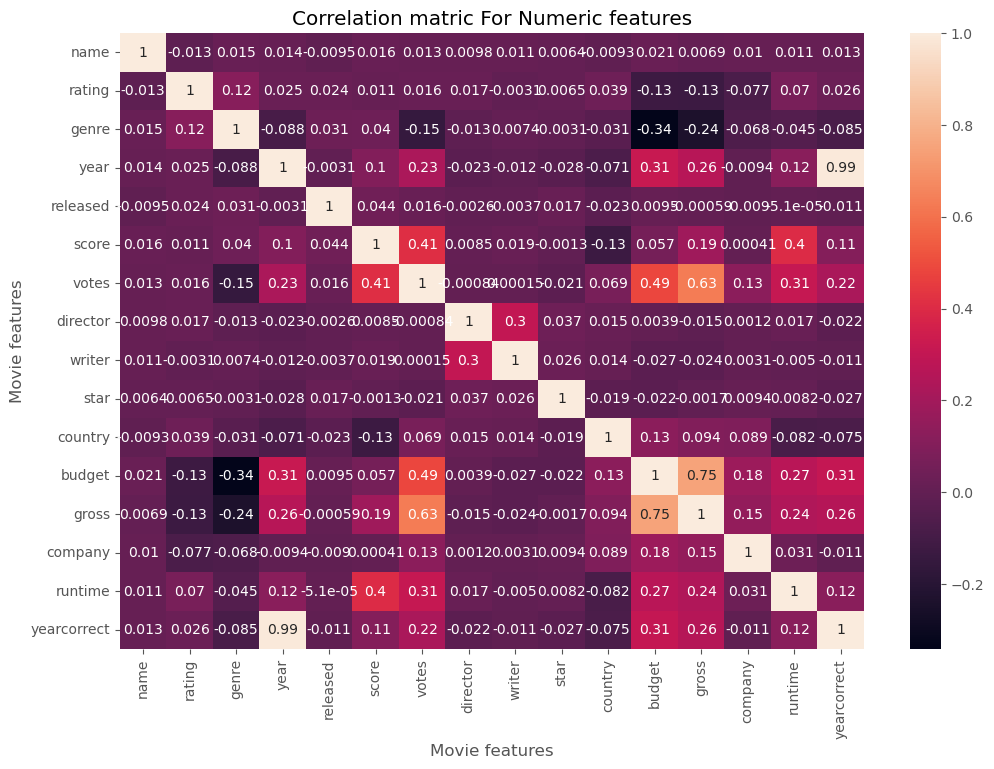

In [83]:
correlation_matrix = df_numarized.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matric For Numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')
plt.show()

In [87]:
df_numarized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.012550,0.015062,0.013641,-0.009465,0.015654,0.013315,0.009792,0.010514,0.006384,-0.009323,0.021046,0.006940,0.010095,0.011340,0.012758
rating,-0.012550,1.000000,0.117753,0.024596,0.024416,0.011299,0.016108,0.016981,-0.003094,0.006475,0.038512,-0.126947,-0.129109,-0.076939,0.069988,0.025974
genre,0.015062,0.117753,1.000000,-0.087680,0.031494,0.039653,-0.148207,-0.013124,0.007413,-0.003115,-0.031004,-0.341894,-0.240743,-0.068484,-0.044540,-0.084738
year,0.013641,0.024596,-0.087680,1.000000,-0.003098,0.102859,0.226686,-0.023254,-0.012152,-0.027971,-0.070711,0.314683,0.264557,-0.009398,0.120743,0.991923
released,-0.009465,0.024416,0.031494,-0.003098,1.000000,0.044072,0.016417,-0.002582,-0.003672,0.017295,-0.023086,0.009490,-0.000587,-0.009044,-0.000051,-0.010600
score,0.015654,0.011299,0.039653,0.102859,0.044072,1.000000,0.412371,0.008487,0.019279,-0.001330,-0.129401,0.057153,0.188572,0.000414,0.400937,0.107973
votes,0.013315,0.016108,-0.148207,0.226686,0.016417,0.412371,1.000000,-0.000837,0.000150,-0.021215,0.069354,0.485225,0.632940,0.129516,0.309372,0.222416
director,0.009792,0.016981,-0.013124,-0.023254,-0.002582,0.008487,-0.000837,1.000000,0.297659,0.037225,0.014758,0.003922,-0.015212,0.001178,0.017358,-0.021942
writer,0.010514,-0.003094,0.007413,-0.012152,-0.003672,0.019279,0.000150,0.297659,1.000000,0.026239,0.014268,-0.027218,-0.023871,0.003140,-0.004950,-0.010506
star,0.006384,0.006475,-0.003115,-0.027971,0.017295,-0.001330,-0.021215,0.037225,0.026239,1.000000,-0.018733,-0.022294,-0.001677,0.009362,0.008246,-0.027185


In [89]:
correlation_mat = df_numarized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.012550
             genre          0.015062
             year           0.013641
             released      -0.009465
             score          0.015654
             votes          0.013315
             director       0.009792
             writer         0.010514
             star           0.006384
             country       -0.009323
             budget         0.021046
             gross          0.006940
             company        0.010095
             runtime        0.011340
             yearcorrect    0.012758
rating       name          -0.012550
             rating         1.000000
             genre          0.117753
             year           0.024596
             released       0.024416
             score          0.011299
             votes          0.016108
             director       0.016981
             writer        -0.003094
             star           0.006475
             country        0.038512
 

In [91]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.341894
budget       genre         -0.341894
genre        gross         -0.240743
gross        genre         -0.240743
votes        genre         -0.148207
genre        votes         -0.148207
score        country       -0.129401
country      score         -0.129401
rating       gross         -0.129109
gross        rating        -0.129109
rating       budget        -0.126947
budget       rating        -0.126947
year         genre         -0.087680
genre        year          -0.087680
             yearcorrect   -0.084738
yearcorrect  genre         -0.084738
country      runtime       -0.081965
runtime      country       -0.081965
rating       company       -0.076939
company      rating        -0.076939
yearcorrect  country       -0.075442
country      yearcorrect   -0.075442
year         country       -0.070711
country      year          -0.070711
genre        company       -0.068484
company      genre         -0.068484
runtime      genre         -0.044540
g

In [93]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes        gross          0.632940
gross        votes          0.632940
budget       gross          0.750535
gross        budget         0.750535
year         yearcorrect    0.991923
yearcorrect  year           0.991923
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

# votes and gross have the highest correlation to gross earnings